# 🔎 Comparación de Detección de Anomalías: Isolation Forest vs One-Class SVM
Equivalente a `scripts/main_comparacion.py`.  
Genera datos sintéticos, entrena ambos modelos, guarda **gráficos** y calcula **métricas**.

## 🔧 Requisitos
```bash
conda activate especialidadmachinelearning
pip install seaborn
```

In [1]:
!pip install scikit-learn matplotlib seaborn pandas hdbscan kagglehub umap-learn
%matplotlib inline

In [2]:
import os, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
# ✅ Ajustar path para importar desde src/
import sys
from pathlib import Path
# Ir desde notebooks/ hacia la raíz del proyecto
project_root = Path().resolve().parent
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

from src.utils import generar_datos, preprocesar_datos
from src.modelos import entrenar_modelos
from src.visualizador import visualizar_resultados
from src.evaluador import evaluar
sns.set(style='whitegrid')
output_dir = "outputs"; os.makedirs(output_dir, exist_ok=True)

/home/mparraf/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


🔹 Iniciando comparación entre Isolation Forest y One-Class SVM...


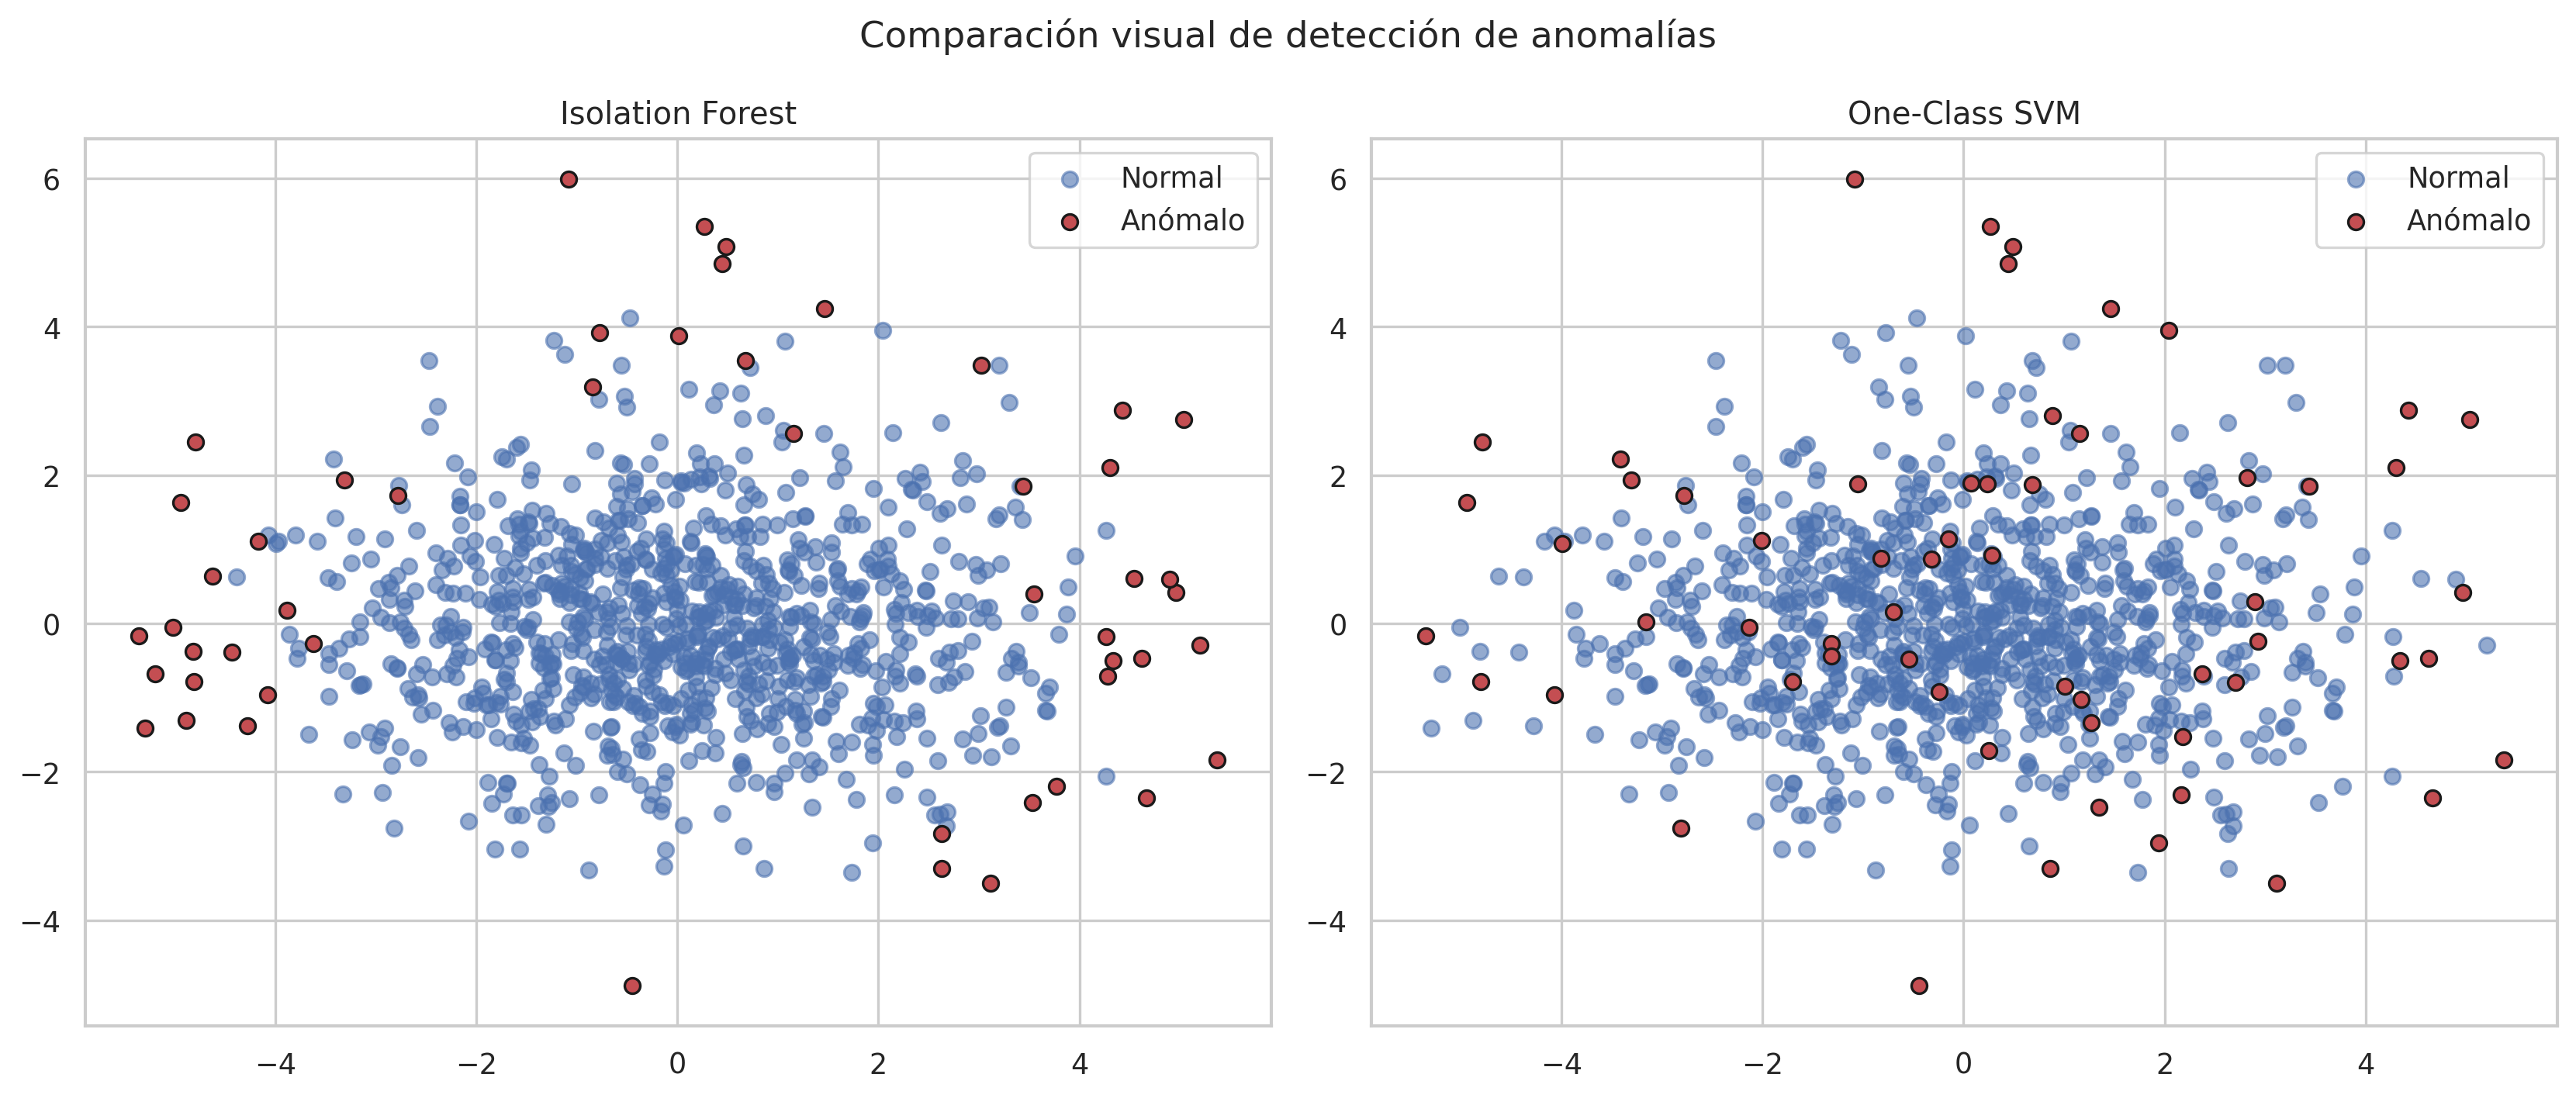

📊 Gráfico comparativo guardado en: outputs/comp_anomalias_IF_vs_OCSVM_contamination0.05_gamma0.1_nu0.05.png
Modelo: IsolationForest
F1 Score: 0.22
ROC AUC: 0.59
Matriz de confusión:
[[911  39]
 [ 39  11]]
🖼️ Matriz de confusión guardada en: outputs/cm_IsolationForest_contamination0.05_gamma0.1_nu0.05.png

Modelo: OneClassSVM
F1 Score: 0.22
ROC AUC: 0.59
Matriz de confusión:
[[902  48]
 [ 38  12]]
🖼️ Matriz de confusión guardada en: outputs/cm_OneClassSVM_contamination0.05_gamma0.1_nu0.05.png



{'f1': 0.2181818181818182,
 'roc_auc': 0.5947368421052632,
 'cm_path': 'outputs/cm_OneClassSVM_contamination0.05_gamma0.1_nu0.05.png'}

In [3]:
%matplotlib inline
from IPython.display import display
import matplotlib.pyplot as plt

# opcional: mejor nitidez/tamaño
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.dpi'] = 120
plt.rcParams['figure.figsize'] = (8, 6)

print("🔹 Iniciando comparación entre Isolation Forest y One-Class SVM...")
# Datos + preprocesamiento
X, y = generar_datos(n_samples=1000, n_features=10, weight_normales=0.95, seed=42)
X_scaled, X_pca = preprocesar_datos(X)
# Entrenamiento
iso_pred, svm_pred, params = entrenar_modelos(X_scaled, if_contamination=0.05, svm_gamma=0.1, svm_nu=0.05)
# Visual comparativa (se guarda automáticamente)
_ = visualizar_resultados(X_pca, iso_pred, svm_pred, params)
# Métricas y matrices de confusión (se guardan automáticamente)
evaluar(y, iso_pred, "IsolationForest", params)
evaluar(y, svm_pred, "OneClassSVM", params)

✅ Salidas generadas en `outputs/`:  
- `comp_anomalias_IF_vs_OCSVM_contamination...png`  
- `cm_IsolationForest_contamination...png`  
- `cm_OneClassSVM_contamination...png`